In [1]:
#Подключаем все необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from tqdm.auto import tqdm
from scipy.stats import mannwhitneyu
import My_own_def as md

plt.style.use('ggplot')

In [2]:
df_groups=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-litvintseva-28/Проект_2_groups.csv',sep=';')
df_group_add=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-litvintseva-28/Проект_2_group_add.csv')
df_activ=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-litvintseva-28/Проект_2_active_studs.csv')
df_checks=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-litvintseva-28/Проект_2_checks.csv',sep=';')

In [3]:
df_groups_add=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-litvintseva-28/Проект_2_group_add.csv')

In [85]:
def make_df_and_metricks(group, group_add, activ, checks):
    """Функция для добавление доп.данных и перерасчета метрик"""
    df=pd.concat([group,group_add])
    df_ac=df.merge(activ,left_on='id',right_on='student_id',how='left')
    data=df_ac.merge(checks,left_on='id',right_on='student_id',how='left')
    data.columns = ['id', 'group', 'activ', 'checks','rev']
    data[['activ', 'checks','rev']] = data[['activ', 'checks','rev']]. fillna (0)
    data['activ']=pd.Series(map(lambda x: 1 if x>0 else 0,  data['activ']))
    data['checks']=pd.Series(map(lambda x: 1 if x>0 else 0,  data['checks']))
    
    return data.query('activ==1').groupby('group',as_index=False).agg(count=('id','count'),\
                                                       CR=('checks','mean'),\
                                                       ARPU=('rev','mean'),\
                                                       ARPPU=('rev',lambda x: np.mean(pd.Series(x).loc[lambda x : x > 0])))

In [86]:
data=make_df_and_metricks(df_groups,df_group_add,df_activ,df_checks)

In [87]:
round(data,2)

,group,count,CR,ARPU,ARPPU
0,A,1538,0.05,47.35,933.59
1,B,6803,0.05,58.06,1257.88


In [88]:
def visual(data_metricks):
    """Функция для визцализации метрик"""
    fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (12, 3)) 

    axs[0].bar(data_metricks.group,data_metricks.ARPU, color=['green', 'red'], alpha=0.6)
    axs[0].set_title('ARPU')

    axs[1].bar(data_metricks.group, data_metricks.ARPPU, color=['green', 'red'], alpha=0.6)
    axs[1].set_title('ARPPU')

    axs[2].bar(data_metricks.group, data_metricks.CR, color=['green', 'red'], alpha=0.6)
    axs[2].set_title('CR')

    plt.show()

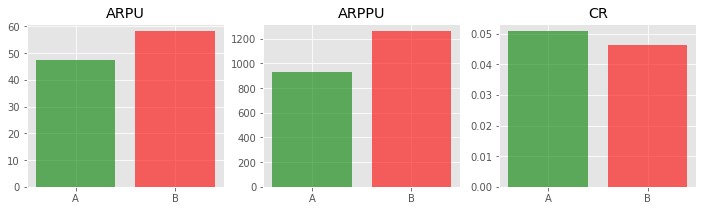

In [89]:
visual(data)